In [3]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
from PIL import ImageTk, Image

In [45]:
def cartoonify(ImagePath):
  #read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
    plt.imshow(originalmage, cmap='gray')

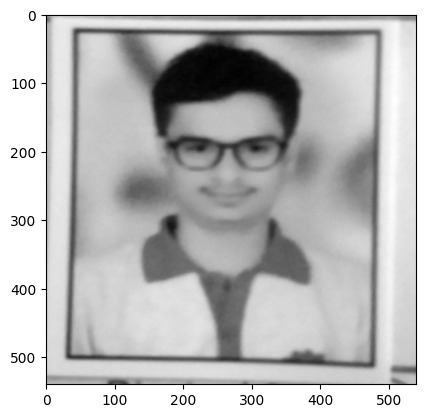

In [46]:
originalmage = cv2.imread("Photo.jpg")
ReSized1 = cv2.resize(originalmage, (540, 540))
#converting an image to grayscale
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (540, 540))
plt.imshow(ReSized2, cmap='gray')

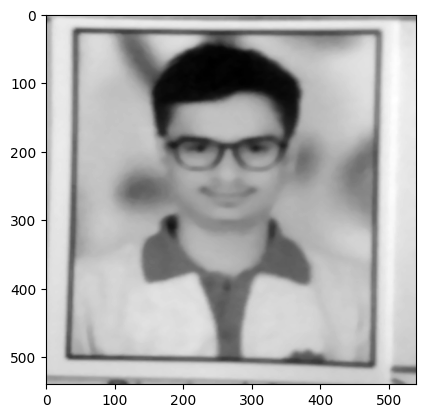

In [40]:
#applying median blur to smoothen an image
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (540, 540))
plt.imshow(ReSized3, cmap='gray')

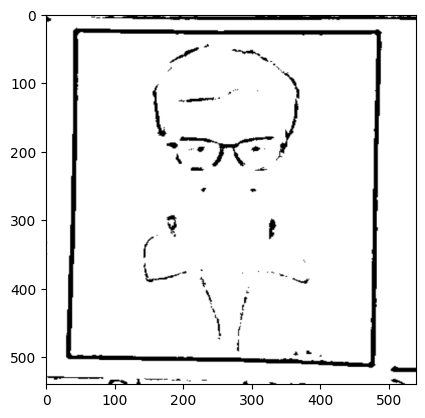

In [41]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
  cv2.ADAPTIVE_THRESH_MEAN_C,
  cv2.THRESH_BINARY, 9, 9)
ReSized4 = cv2.resize(getEdge, (540, 540))
plt.imshow(ReSized4, cmap='gray')

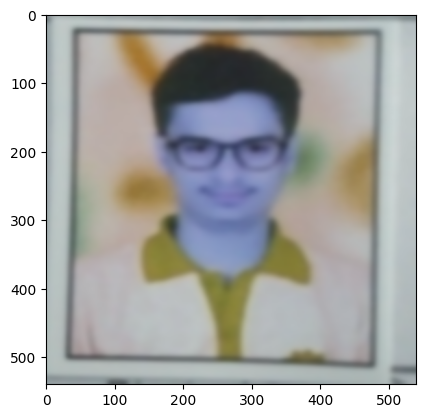

In [42]:
#applying bilateral filter to remove noise
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (540, 540))
plt.imshow(ReSized5, cmap='gray')

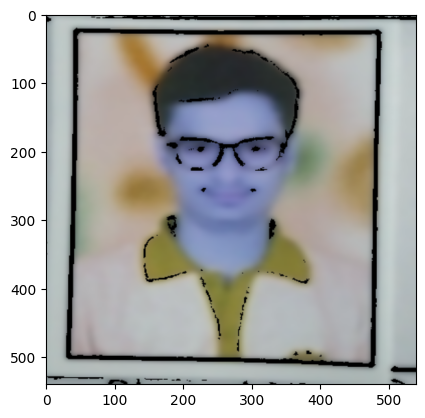

In [43]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv2.resize(cartoonImage, (540, 540))
plt.imshow(ReSized6, cmap='gray')

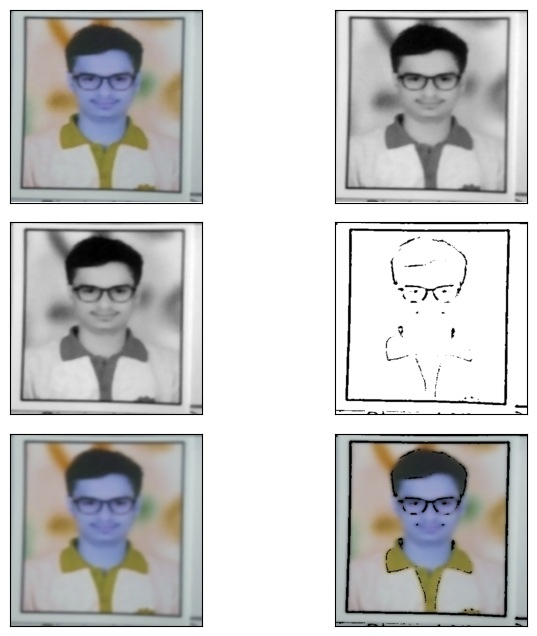

In [47]:
# Plotting the whole transition
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
plt.show()